In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

import re
import nltk

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
from PIL import Image
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import warnings

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

In [2]:
pip install twython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from twython import Twython

CONSUMER_KEY = '0pJRCT1emkOcrtxHl7lMN4N5A'
CONSUMER_SECRET = 'IS4Gxcx1aQ1c5Hyei5PSePLS37IcVmYBT8Qt1t4IOxmLIxJD42'

twitter = Twython(CONSUMER_KEY,CONSUMER_SECRET)

### Scrape tweets about FIFA23 & EDA

In [4]:
results = twitter.search( q='FIFA 23', count=1000)
type(results)

dict

In [5]:
results

{'statuses': [{'created_at': 'Mon Oct 10 19:10:42 +0000 2022',
   'id': 1579550004095881217,
   'id_str': '1579550004095881217',
   'text': '@EASPORTSFIFA please fix FIFA 23 pro clubs. I can\'t even join the game. Error- "unexpected error occurred while att… https://t.co/6XlIEcuOtD',
   'truncated': True,
   'entities': {'hashtags': [],
    'symbols': [],
    'user_mentions': [{'screen_name': 'EASPORTSFIFA',
      'name': 'EA SPORTS FIFA',
      'id': 105297123,
      'id_str': '105297123',
      'indices': [0, 13]}],
    'urls': [{'url': 'https://t.co/6XlIEcuOtD',
      'expanded_url': 'https://twitter.com/i/web/status/1579550004095881217',
      'display_url': 'twitter.com/i/web/status/1…',
      'indices': [117, 140]}]},
   'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
   'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
   'in_reply_to_status_id': None,
   'in_reply_to_status_id_str': None,
   'in_reply_to_user_id'

In [6]:
all_items=results['statuses']

In [7]:
tweet_df=pd.DataFrame(all_items)
tweet_df.head()

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,extended_entities,retweeted_status,possibly_sensitive
0,Mon Oct 10 19:10:42 +0000 2022,1579550004095881217,1579550004095881217,@EASPORTSFIFA please fix FIFA 23 pro clubs. I ...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,None,False,0,0,False,False,en,NaN,NaN,NaN
1,Mon Oct 10 19:10:36 +0000 2022,1579549980909801474,1579549980909801474,Nie zagrałem dzisiaj meczu w FIFA 23. Duma.,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'pl', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,None,False,0,0,False,False,pl,NaN,NaN,NaN
2,Mon Oct 10 19:10:14 +0000 2022,1579549886738927617,1579549886738927617,Je vends des credits fifa 23,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'fr', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,None,False,0,0,False,False,fr,NaN,NaN,NaN
3,Mon Oct 10 19:10:10 +0000 2022,1579549872264736768,1579549872264736768,RT @challas07: 20x Copies of FIFA 23 is going ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,None,False,54,0,False,False,en,"{'media': [{'id': 1579540734633443347, 'id_str...",{'created_at': 'Mon Oct 10 18:33:53 +0000 2022...,False
4,Mon Oct 10 19:10:09 +0000 2022,1579549867403509760,1579549867403509760,RT @FUTWORKSHOP: Goals for Fifa 23\n\nHit 1000...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,None,False,8,0,False,False,en,NaN,{'created_at': 'Sun Sep 25 22:40:10 +0000 2022...,NaN


In [8]:
tweet_user=pd.DataFrame([d['user'] for d in results['statuses']])
tweet_user.head()

,id,id_str,name,screen_name,location,description,url,entities,protected,followers_count,...,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,withheld_in_countries,profile_banner_url
0,1527879457888935939,1527879457888935939,Sai,OnlymeSai,"East, England",,None,{'description': {'urls': []}},False,1,...,True,True,True,False,None,None,None,none,[],NaN
1,1222905521818095616,1222905521818095616,Oskar,ViSKar9091,,"Lubie muzyczke, fife, mma i piłke nozzzzną",None,{'description': {'urls': []}},False,91,...,True,False,True,False,None,None,None,none,[],https://pbs.twimg.com/profile_banners/12229055...
2,1577261698091782145,1577261698091782145,oui k,ouik06263230,,,None,{'description': {'urls': []}},False,1,...,True,True,True,True,None,None,None,none,[],NaN
3,979109813329285121,979109813329285121,Amin,AmiAK2077,,,None,{'description': {'urls': []}},False,25,...,True,False,True,False,None,None,None,none,[],https://pbs.twimg.com/profile_banners/97910981...
4,1485304360733138949,1485304360733138949,TR,TR_Man8,"Berlin, Deutschland",~Student~ 🇩🇪🇬🇧🇫🇷🇪🇸🇵🇹,None,{'description': {'urls': []}},False,82,...,True,True,True,False,None,None,None,none,[],https://pbs.twimg.com/profile_banners/14853043...


In [9]:
twitter_df=tweet_df.merge(tweet_user, left_index=True,right_index=True)

### Finding Locations of mostTweets

In [10]:
twitter_df.head()

,created_at_x,id_x,id_str_x,text,truncated,entities_x,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,withheld_in_countries,profile_banner_url
0,Mon Oct 10 19:10:42 +0000 2022,1579550004095881217,1579550004095881217,@EASPORTSFIFA please fix FIFA 23 pro clubs. I ...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,True,True,True,False,None,None,None,none,[],NaN
1,Mon Oct 10 19:10:36 +0000 2022,1579549980909801474,1579549980909801474,Nie zagrałem dzisiaj meczu w FIFA 23. Duma.,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'pl', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,True,False,True,False,None,None,None,none,[],https://pbs.twimg.com/profile_banners/12229055...
2,Mon Oct 10 19:10:14 +0000 2022,1579549886738927617,1579549886738927617,Je vends des credits fifa 23,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'fr', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,True,True,True,True,None,None,None,none,[],NaN
3,Mon Oct 10 19:10:10 +0000 2022,1579549872264736768,1579549872264736768,RT @challas07: 20x Copies of FIFA 23 is going ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,True,False,True,False,None,None,None,none,[],https://pbs.twimg.com/profile_banners/97910981...
4,Mon Oct 10 19:10:09 +0000 2022,1579549867403509760,1579549867403509760,RT @FUTWORKSHOP: Goals for Fifa 23\n\nHit 1000...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,True,True,True,False,None,None,None,none,[],https://pbs.twimg.com/profile_banners/14853043...


In [11]:
twitter_df.shape

(100, 70)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127988 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 917607 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 917602 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 917619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 917603 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 917620 missing from current font.
  fon

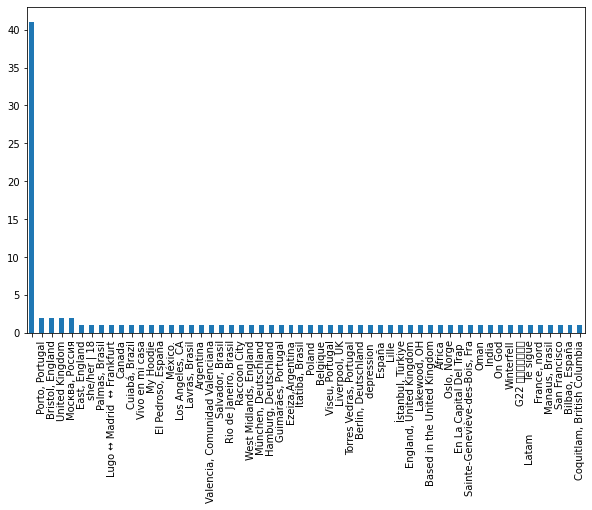

In [12]:
twitter_df.location.value_counts().plot(kind='bar',figsize=(10,6))

### CLEANING THE DATA --- NLP Pre-Processing

In [13]:
text_df=pd.DataFrame(twitter_df['text'])
text_df

,text
0,@EASPORTSFIFA please fix FIFA 23 pro clubs. I ...
1,Nie zagrałem dzisiaj meczu w FIFA 23. Duma.
2,Je vends des credits fifa 23
3,RT @challas07: 20x Copies of FIFA 23 is going ...
4,RT @FUTWORKSHOP: Goals for Fifa 23\n\nHit 1000...
...,...
95,"Fifa 23 pue du cul wsh, des PASSES la base du ..."
96,Me julguem\n\nMas eu realmente achei interessa...
97,ya un cheat sur fifa 23 a 80k sa s’appelle tom...
98,@louis15032 https://t.co/XZsgJkHr7P


### STEPS TO DO IN NLP

In [14]:
text_df['text']=text_df['text'].str.lower()
text_df['text']=text_df['text'].str.replace("[^a-zA-Z0-9\s]",'')
text_df['text']=text_df['text'].str.replace('\d+','')
text_df['text']=text_df['text'].str.replace('\n','').replace('\r','')

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
stopwords=stopwords.words('english')

In [17]:
text_df['text']=text_df['text'].apply(lambda x : ' '.join(i for i in x.split() if i not in stopwords))

In [18]:
text_df

,text
0,easportsfifa please fix fifa pro clubs cant ev...
1,nie zagraem dzisiaj meczu w fifa duma
2,je vends des credits fifa
3,rt challas x copies fifa going given outmust f...
4,rt futworkshop goals fifa hit twitch followers...
...,...
95,fifa pue du cul wsh des passes la base du foot...
96,julguemmas eu realmente achei interessante ess...
97,ya un cheat sur fifa k sa sappelle tomori vrm ...
98,louis httpstcoxzsgjkhrp


### Language Detection

In [19]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
from langdetect import detect
text_df['language']=text_df['text'].apply(detect)
text_df=text_df[text_df['language']=='en']
text_df

,text,language
0,easportsfifa please fix fifa pro clubs cant ev...,en
3,rt challas x copies fifa going given outmust f...,en
4,rt futworkshop goals fifa hit twitch followers...,en
6,eafifadirect httpstcotjbrjeiyplease fix fifa c...,en
7,pten fifa noite de chillfazer misses ver equip...,en
10,rt wtbywayne fifa womens gameplay england vs u...,en
11,therealshadyun wcgifredy fifa,en
14,rt futworkshop goals fifa hit twitch followers...,en
16,rt waynejacksongam fifa womens gameplay englan...,en
18,tryhard fifa dakika delayhttpstcougcautymg,en


In [21]:
from textblob import TextBlob
text_df[['polarity','subjectivity']]=text_df['text'].apply(lambda t:pd.Series(TextBlob(t).sentiment))

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [22]:
text_df

,text,language,polarity,subjectivity
0,easportsfifa please fix fifa pro clubs cant ev...,en,-0.150000,0.700000
3,rt challas x copies fifa going given outmust f...,en,0.000000,0.000000
4,rt futworkshop goals fifa hit twitch followers...,en,1.000000,1.000000
6,eafifadirect httpstcotjbrjeiyplease fix fifa c...,en,0.000000,1.000000
7,pten fifa noite de chillfazer misses ver equip...,en,0.000000,0.000000
10,rt wtbywayne fifa womens gameplay england vs u...,en,0.187500,0.250000
11,therealshadyun wcgifredy fifa,en,0.000000,0.000000
14,rt futworkshop goals fifa hit twitch followers...,en,1.000000,1.000000
16,rt waynejacksongam fifa womens gameplay englan...,en,0.187500,0.250000
18,tryhard fifa dakika delayhttpstcougcautymg,en,0.000000,0.000000


In [23]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
text_df['tokenized']=[tokenizer.tokenize(i) for i in text_df['text'].values]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
text_df

,text,language,polarity,subjectivity,tokenized
0,easportsfifa please fix fifa pro clubs cant ev...,en,-0.150000,0.700000,"[easportsfifa, please, fix, fifa, pro, clubs, ..."
3,rt challas x copies fifa going given outmust f...,en,0.000000,0.000000,"[rt, challas, x, copies, fifa, going, given, o..."
4,rt futworkshop goals fifa hit twitch followers...,en,1.000000,1.000000,"[rt, futworkshop, goals, fifa, hit, twitch, fo..."
6,eafifadirect httpstcotjbrjeiyplease fix fifa c...,en,0.000000,1.000000,"[eafifadirect, httpstcotjbrjeiyplease, fix, fi..."
7,pten fifa noite de chillfazer misses ver equip...,en,0.000000,0.000000,"[pten, fifa, noite, de, chillfazer, misses, ve..."
10,rt wtbywayne fifa womens gameplay england vs u...,en,0.187500,0.250000,"[rt, wtbywayne, fifa, womens, gameplay, englan..."
11,therealshadyun wcgifredy fifa,en,0.000000,0.000000,"[therealshadyun, wcgifredy, fifa]"
14,rt futworkshop goals fifa hit twitch followers...,en,1.000000,1.000000,"[rt, futworkshop, goals, fifa, hit, twitch, fo..."
16,rt waynejacksongam fifa womens gameplay englan...,en,0.187500,0.250000,"[rt, waynejacksongam, fifa, womens, gameplay, ..."
18,tryhard fifa dakika delayhttpstcougcautymg,en,0.000000,0.000000,"[tryhard, fifa, dakika, delayhttpstcougcautymg]"


In [25]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [26]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
text_df['lemmatize']=[[lemmatizer.lemmatize(str(i)) for i in words] for words in text_df['text'].values]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
text_df

,text,language,polarity,subjectivity,tokenized,lemmatize
0,easportsfifa please fix fifa pro clubs cant ev...,en,-0.150000,0.700000,"[easportsfifa, please, fix, fifa, pro, clubs, ...","[e, a, s, p, o, r, t, s, f, i, f, a, , p, l, ..."
3,rt challas x copies fifa going given outmust f...,en,0.000000,0.000000,"[rt, challas, x, copies, fifa, going, given, o...","[r, t, , c, h, a, l, l, a, s, , x, , c, o, ..."
4,rt futworkshop goals fifa hit twitch followers...,en,1.000000,1.000000,"[rt, futworkshop, goals, fifa, hit, twitch, fo...","[r, t, , f, u, t, w, o, r, k, s, h, o, p, , ..."
6,eafifadirect httpstcotjbrjeiyplease fix fifa c...,en,0.000000,1.000000,"[eafifadirect, httpstcotjbrjeiyplease, fix, fi...","[e, a, f, i, f, a, d, i, r, e, c, t, , h, t, ..."
7,pten fifa noite de chillfazer misses ver equip...,en,0.000000,0.000000,"[pten, fifa, noite, de, chillfazer, misses, ve...","[p, t, e, n, , f, i, f, a, , n, o, i, t, e, ..."
10,rt wtbywayne fifa womens gameplay england vs u...,en,0.187500,0.250000,"[rt, wtbywayne, fifa, womens, gameplay, englan...","[r, t, , w, t, b, y, w, a, y, n, e, , f, i, ..."
11,therealshadyun wcgifredy fifa,en,0.000000,0.000000,"[therealshadyun, wcgifredy, fifa]","[t, h, e, r, e, a, l, s, h, a, d, y, u, n, , ..."
14,rt futworkshop goals fifa hit twitch followers...,en,1.000000,1.000000,"[rt, futworkshop, goals, fifa, hit, twitch, fo...","[r, t, , f, u, t, w, o, r, k, s, h, o, p, , ..."
16,rt waynejacksongam fifa womens gameplay englan...,en,0.187500,0.250000,"[rt, waynejacksongam, fifa, womens, gameplay, ...","[r, t, , w, a, y, n, e, j, a, c, k, s, o, n, ..."
18,tryhard fifa dakika delayhttpstcougcautymg,en,0.000000,0.000000,"[tryhard, fifa, dakika, delayhttpstcougcautymg]","[t, r, y, h, a, r, d, , f, i, f, a, , d, a, ..."


In [28]:
text_df.loc[text_df['subjectivity']>0.5,'sentiment']=2 
text_df.loc[text_df['subjectivity']==0.5,'sentiment']=1 
text_df.loc[text_df['subjectivity']<0.5,'sentiment']=0 
text_df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,text,language,polarity,subjectivity,tokenized,lemmatize,sentiment
0,easportsfifa please fix fifa pro clubs cant ev...,en,-0.150000,0.700000,"[easportsfifa, please, fix, fifa, pro, clubs, ...","[e, a, s, p, o, r, t, s, f, i, f, a, , p, l, ...",2.0
3,rt challas x copies fifa going given outmust f...,en,0.000000,0.000000,"[rt, challas, x, copies, fifa, going, given, o...","[r, t, , c, h, a, l, l, a, s, , x, , c, o, ...",0.0
4,rt futworkshop goals fifa hit twitch followers...,en,1.000000,1.000000,"[rt, futworkshop, goals, fifa, hit, twitch, fo...","[r, t, , f, u, t, w, o, r, k, s, h, o, p, , ...",2.0
6,eafifadirect httpstcotjbrjeiyplease fix fifa c...,en,0.000000,1.000000,"[eafifadirect, httpstcotjbrjeiyplease, fix, fi...","[e, a, f, i, f, a, d, i, r, e, c, t, , h, t, ...",2.0
7,pten fifa noite de chillfazer misses ver equip...,en,0.000000,0.000000,"[pten, fifa, noite, de, chillfazer, misses, ve...","[p, t, e, n, , f, i, f, a, , n, o, i, t, e, ...",0.0
10,rt wtbywayne fifa womens gameplay england vs u...,en,0.187500,0.250000,"[rt, wtbywayne, fifa, womens, gameplay, englan...","[r, t, , w, t, b, y, w, a, y, n, e, , f, i, ...",0.0
11,therealshadyun wcgifredy fifa,en,0.000000,0.000000,"[therealshadyun, wcgifredy, fifa]","[t, h, e, r, e, a, l, s, h, a, d, y, u, n, , ...",0.0
14,rt futworkshop goals fifa hit twitch followers...,en,1.000000,1.000000,"[rt, futworkshop, goals, fifa, hit, twitch, fo...","[r, t, , f, u, t, w, o, r, k, s, h, o, p, , ...",2.0
16,rt waynejacksongam fifa womens gameplay englan...,en,0.187500,0.250000,"[rt, waynejacksongam, fifa, womens, gameplay, ...","[r, t, , w, a, y, n, e, j, a, c, k, s, o, n, ...",0.0
18,tryhard fifa dakika delayhttpstcougcautymg,en,0.000000,0.000000,"[tryhard, fifa, dakika, delayhttpstcougcautymg]","[t, r, y, h, a, r, d, , f, i, f, a, , d, a, ...",0.0


In [29]:
text_df.sentiment.value_counts()

0.0    33
2.0    12
1.0     2
Name: sentiment, dtype: int64

### WORD CLOUD

In [30]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [31]:
def create_wordcloud(text):
    mask = np.array(Image.open('fifa23.png'))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask=mask, max_words=25000,
                  stopwords= stopwords)
    wc.generate(str(text))
    wc.to_file('wc.png')
    print('Word Cloud saved successfully')
    display(Image.open('wc.png'))

Word Cloud saved successfully


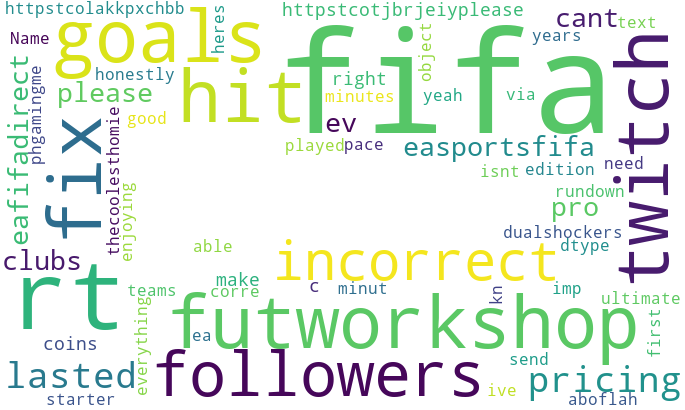

In [32]:
create_wordcloud(text_df[text_df['sentiment']==2].text)

Word Cloud saved successfully


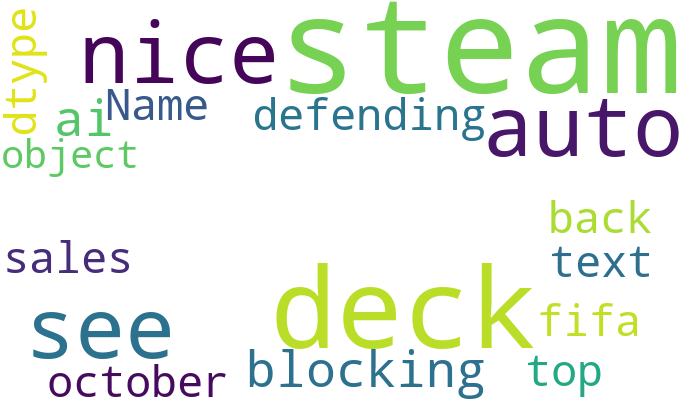

In [33]:
create_wordcloud(text_df[text_df['sentiment']==1].text)

Word Cloud saved successfully


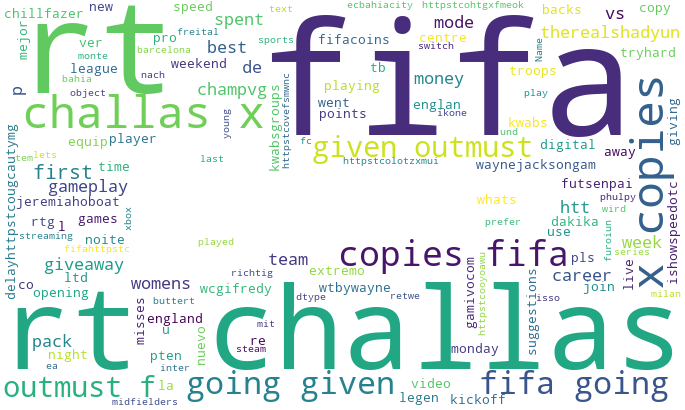

In [34]:
create_wordcloud(text_df[text_df['sentiment']==0].text)

### CLASSIFICATION

In [35]:
clss_df=text_df[['sentiment','text']]

In [36]:
pip install scikit-learn-0.23.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement scikit-learn-0.23.2 (from versions: none)
ERROR: No matching distribution found for scikit-learn-0.23.2


In [37]:
import sklearn

In [40]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
pip install Jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
pip install pycaret --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
import jinja2

In [45]:
from pycaret.classification import setup,compare_models

In [46]:
from pycaret.classification import *

In [47]:
exp_name = setup(data = clss_df, target = 'sentiment', fold_shuffle=True, session_id=2) 
best=compare_models()

""


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 2
INFO:logs:[]
INFO:logs:compare_models() succesfully completed......................................


In [48]:
from pycaret.classification import *
exp_name=setup(data=clss_df,target='sentiment')

,Description,Value
0,session_id,5733
1,Target,sentiment
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(47, 2)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='sentiment',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_st...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [49]:
best_model=compare_models()

""


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 2
INFO:logs:[]
INFO:logs:compare_models() succesfully completed......................................


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [51]:
text_df.sentiment =text_df.sentiment.astype('category')

In [52]:
x,y=text_df['text'],text_df['sentiment']

In [53]:
x.shape,y.shape

((47,), (47,))

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=60)

In [55]:
y_test

90    0.0
32    0.0
47    2.0
49    1.0
67    0.0
21    0.0
82    0.0
36    0.0
76    0.0
77    0.0
27    0.0
37    0.0
Name: sentiment, dtype: category
Categories (3, float64): [0.0, 1.0, 2.0]

In [56]:
vect=CountVectorizer()
x_train_dtm=vect.fit_transform(x_train,y_train)
x_test_dtm=vect.transform(x_test)

In [57]:
x_train_dtm.shape,x_test_dtm.shape

((35, 203), (12, 203))

In [58]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [59]:
b=MultinomialNB()
model=b.fit(x_train_dtm,y_train)
b_predict=b.predict(x_test_dtm)

In [60]:
accuracy_score(y_test,b_predict)

0.6666666666666666